## **Authors: Mohini Aggarwal and LokSundar Ganthi**

## **Importing Libraries**

In [46]:
#Import all the necessary modules
import pandas as pd 
import numpy as np #Math library
import os
import seaborn as sns #Graph library 
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## I**mporting Data File**

In [48]:
#Importing the data
df_credit = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/loan.csv",index_col=0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


 #### Looking at the shape of data

In [49]:
#Looking the data
df_credit.head()
row_count = df_credit.shape[0]
column_count = df_credit.shape[1]
print("Row count: " + str(row_count))
print("Column count: " + str(column_count))
#Known the shape of data
print(df_credit.info())

Row count: 39717
Column count: 110
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Columns: 110 entries, member_id to total_il_high_credit_limit
dtypes: float64(74), int64(12), object(24)
memory usage: 33.6+ MB
None


## **Data Cleaning**

 #### Missing value cleanup

In [50]:
# Delete columns with more than 85% NA 
missingColumnThresh = row_count * 0.85
missingColumnThresh = round(missingColumnThresh)
print("Remove columns with data in less than " + str(missingColumnThresh) + " (85%) rows")
df_credit.dropna(axis=1, thresh=missingColumnThresh, inplace=True)
row_count = df_credit.shape[0]
print("Row count: " + str(row_count))
column_count = df_credit.shape[1]
print("Column count: " + str(column_count))

# Delete rows with more than 85% NA
missingRowThresh = column_count * 0.85
missingRowThresh = round(missingRowThresh)
print("Remove rows with data in less than " + str(missingRowThresh) + " (85%) columns")
df_credit.dropna(axis=0, thresh=round(missingRowThresh), inplace=True)
row_count = df_credit.shape[0]
print("Row count: " + str(row_count))
column_count = df_credit.shape[1]
print("Column count: " + str(column_count))


Remove columns with data in less than 33759 (85%) rows
Row count: 39717
Column count: 52
Remove rows with data in less than 44 (85%) columns
Row count: 39717
Column count: 52


#### Checking column data types

In [51]:
# Check if all columns have consistent data types
df_credit.dtypes

member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc    

#### Dropping unrequired rows and columns

In [52]:
# Drop the following columns as they are customer behavior columns and are not available at the time of loan application
not_req_columns= ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'revol_bal', 'out_prncp_inv', 'total_acc', 'revol_util', 'out_prncp', 'total_pymnt', 'last_credit_pull_d', 'last_pymnt_d', 'last_pymnt_amnt', 'collection_recovery_fee']
df_credit.drop(columns=not_req_columns, inplace=True)
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status      

In [53]:
# Delete rows with customers marked as "Current"
df_credit.drop(df_credit.loc[df_credit['loan_status'] == "Current"].index, inplace = True)
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 1077501 to 87023
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   38577 non-null  int64  
 1   loan_amnt                   38577 non-null  int64  
 2   funded_amnt                 38577 non-null  int64  
 3   funded_amnt_inv             38577 non-null  float64
 4   term                        38577 non-null  object 
 5   int_rate                    38577 non-null  object 
 6   installment                 38577 non-null  float64
 7   grade                       38577 non-null  object 
 8   sub_grade                   38577 non-null  object 
 9   emp_title                   36191 non-null  object 
 10  emp_length                  37544 non-null  object 
 11  home_ownership              38577 non-null  object 
 12  annual_inc                  38577 non-null  float64
 13  verification_status      

## **Distribution plots**

### **Uni-Variate analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


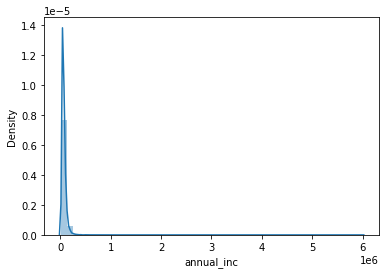

In [54]:
sns.distplot(df_credit['annual_inc'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


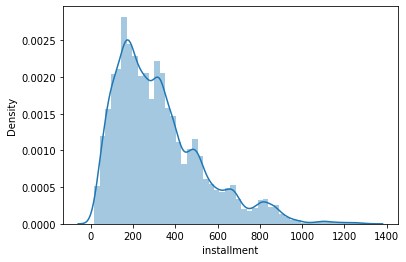

In [55]:
sns.distplot(df_credit['installment'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


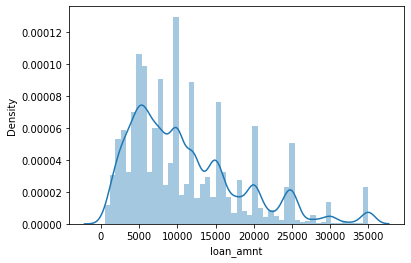

In [56]:
sns.distplot(df_credit['loan_amnt'])

### **Bi-Variate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


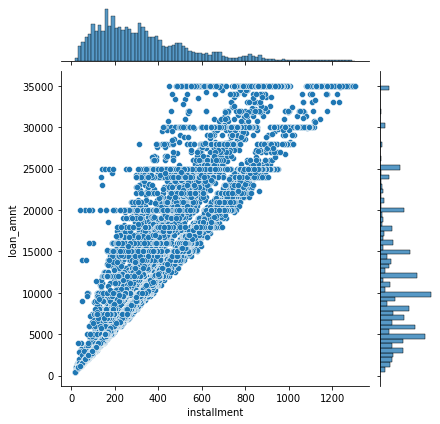

In [57]:
sns.jointplot(df_credit['installment'], df_credit['loan_amnt'])
#We can see the scatter plot between these and clear outliers are visible. we will proceed with more bivariate analysis.

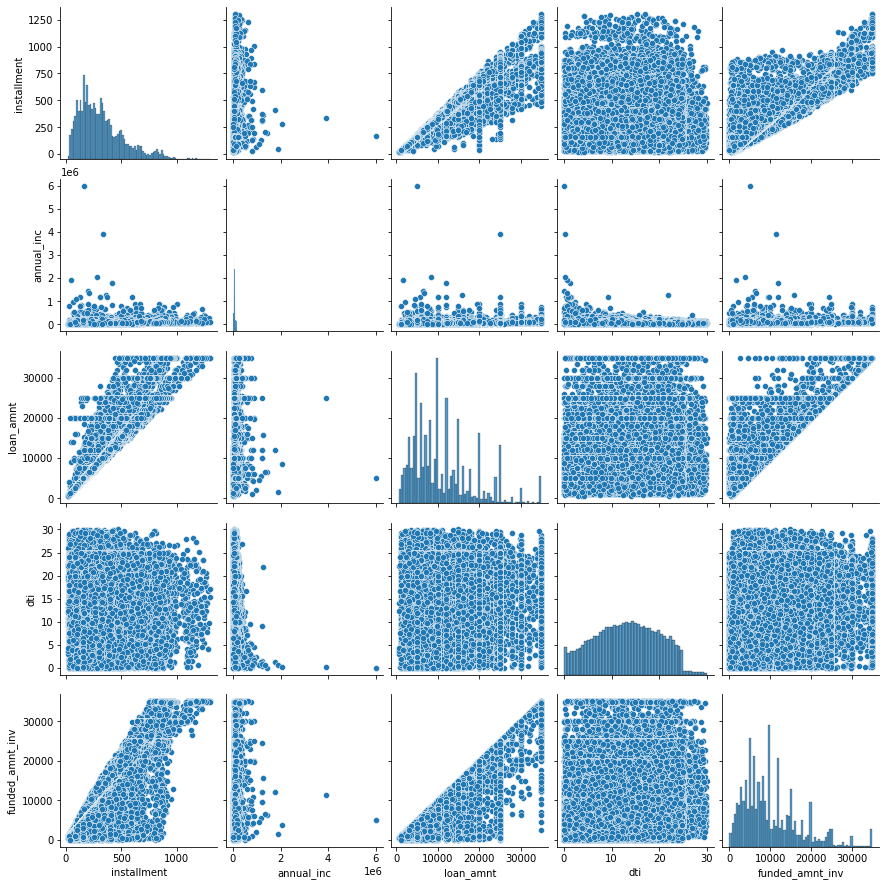

In [58]:
# Using pairplot to visualize the 2 way interactions between factors.
sns.pairplot(df_credit[['installment', 'annual_inc', 'loan_amnt','dti','funded_amnt_inv']])

#### "Home ownership" against other variables

In [59]:
df_credit.groupby('home_ownership').mean()
# Summarize and observe the difference between 0 and 1 outcome means for different factors.

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
home_ownership,,,,,,,,,,,,,,
MORTGAGE,855012.431878,12468.973621,12113.559720,11517.578154,354.416023,83021.061885,13.110272,0.0,1.0,0.0,0.0,0.0,0.050748,0.0
NONE,152646.666667,5600.000000,5600.000000,1592.686667,176.426667,80733.333333,11.746667,0.0,1.0,0.0,0.0,0.0,NaN,0.0
OTHER,431096.836735,10663.010204,10148.724490,7354.949676,338.745714,71309.714286,11.251939,0.0,1.0,0.0,0.0,0.0,0.030612,0.0
OWN,837544.653445,10138.100840,9929.521008,9470.189809,298.636545,58888.182797,13.182171,0.0,1.0,0.0,0.0,0.0,0.040851,0.0
RENT,833616.640043,9886.584145,9701.300054,9167.347334,296.812659,57236.120159,13.447898,0.0,1.0,0.0,0.0,0.0,0.037238,0.0


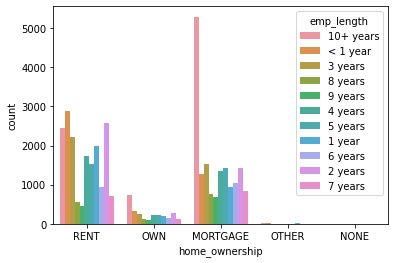

In [60]:
sns.countplot(x='home_ownership', data=df_credit, hue='emp_length')

#### Interest V/s Term plot

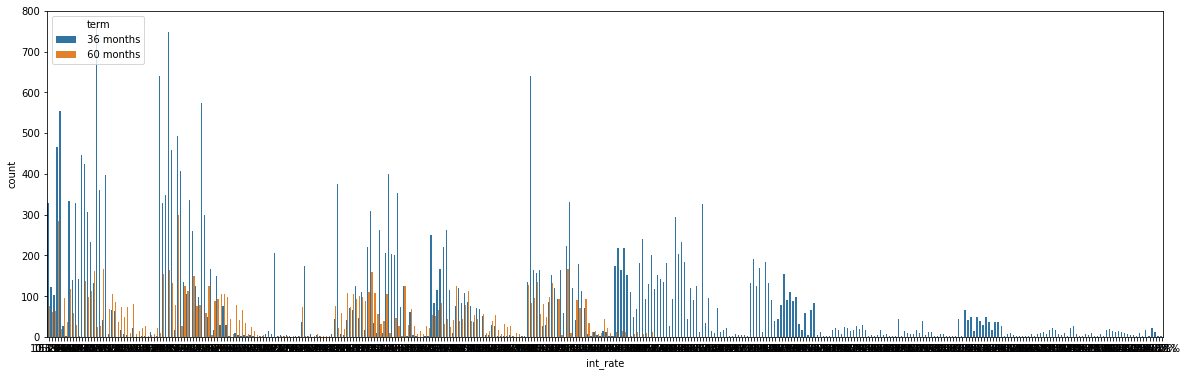

In [61]:
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = "int_rate",data=df_credit, hue = "term")

### **Multi-Variate Analysis**

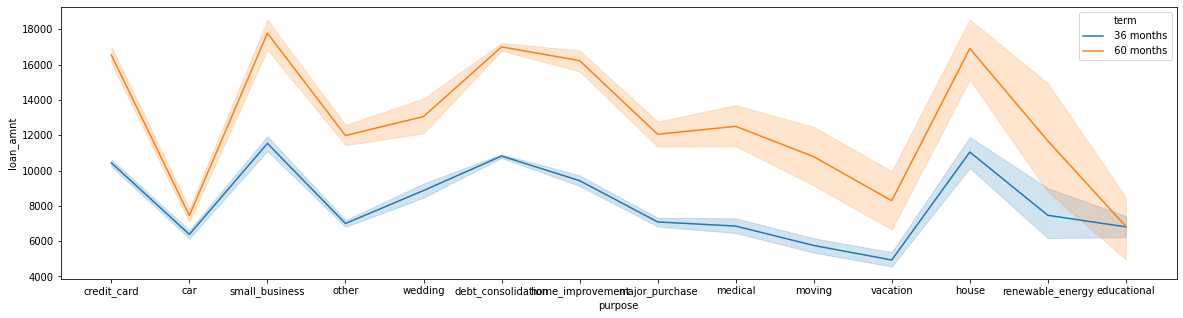

In [62]:
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=df_credit, x="purpose", y="loan_amnt", hue="term")

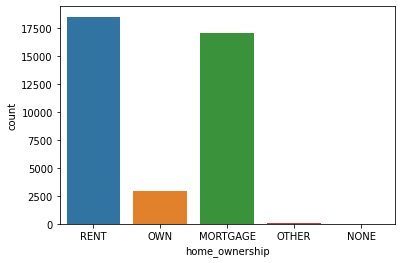

In [63]:
sns.countplot(x='home_ownership', data=df_credit)

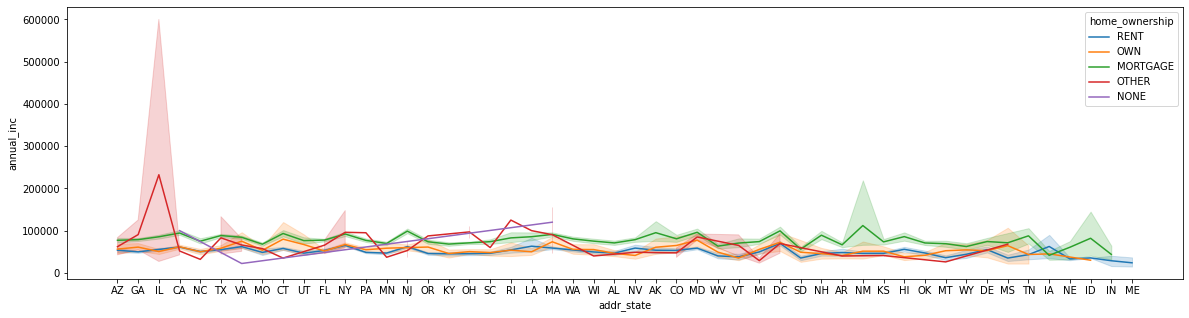

In [64]:
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=df_credit, x="addr_state", y="annual_inc", hue="home_ownership")

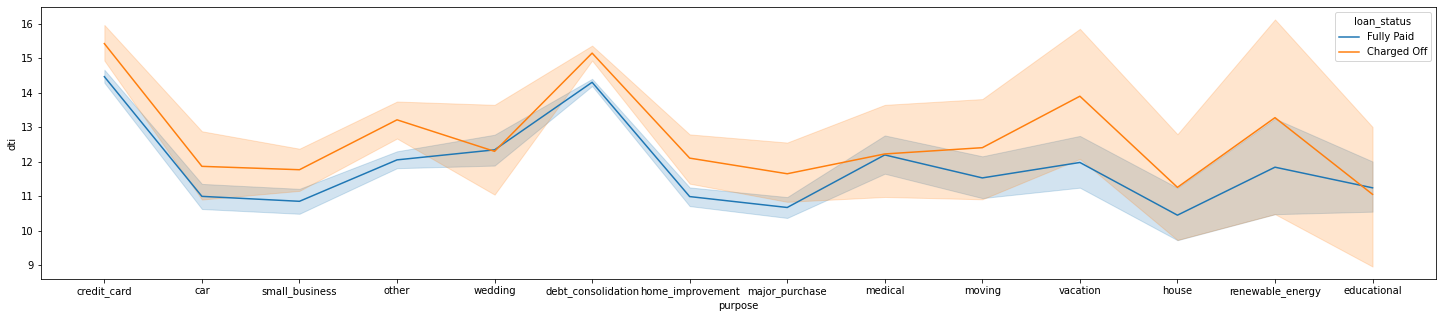

In [65]:
fig_dims = (25, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=df_credit, x="purpose", y="dti", hue="loan_status")

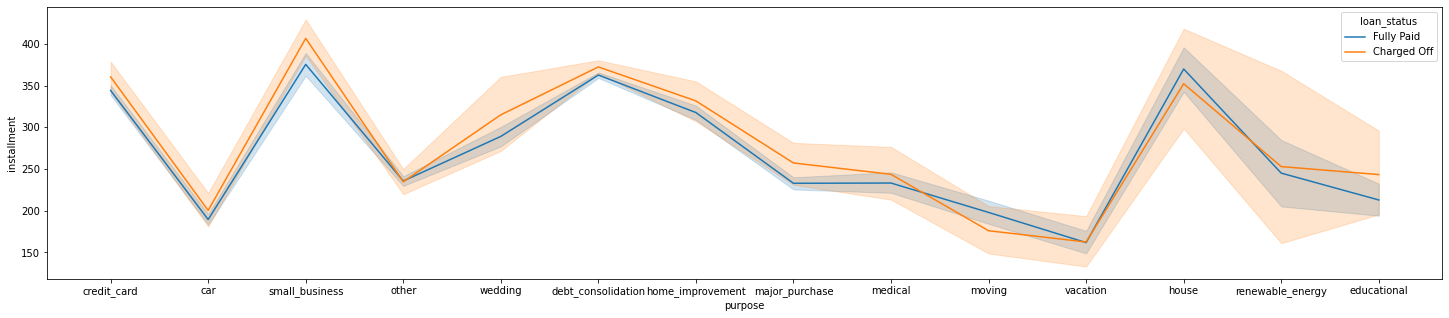

In [66]:
fig_dims = (25, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=df_credit, x="purpose", y="installment", hue="loan_status")

### **Box Plot**

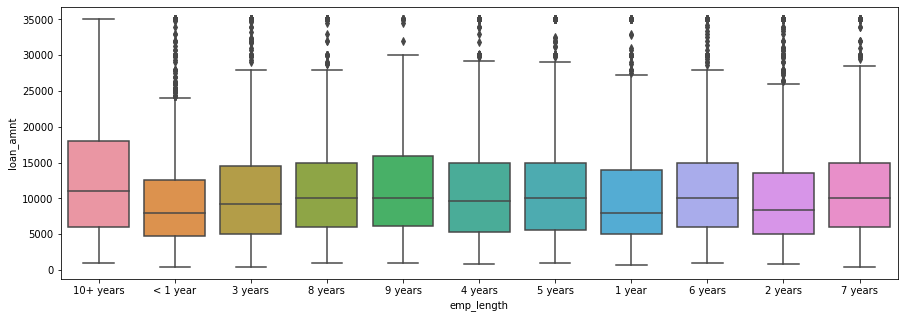

In [67]:
# identify the outliers and interpret the split of the data in a 2 way pattern.
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='emp_length', y='loan_amnt', data =df_credit)

### **Correlation** 

In [68]:
# Looking at the correlation for the factors using Pearson's coefficient.
df_credit.corr('pearson')

#significant correlations (threshold 30%):

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
member_id,1.000000,0.120393,0.130307,0.241324,0.070918,0.006442,0.092910,NaN,NaN,NaN,NaN,NaN,-0.007346,NaN
loan_amnt,0.120393,1.000000,0.981790,0.937922,0.932260,0.268999,0.062436,NaN,NaN,NaN,NaN,NaN,-0.035981,NaN
funded_amnt,0.130307,0.981790,1.000000,0.956172,0.958035,0.264798,0.062194,NaN,NaN,NaN,NaN,NaN,-0.036995,NaN
funded_amnt_inv,0.241324,0.937922,0.956172,1.000000,0.905464,0.251981,0.070663,NaN,NaN,NaN,NaN,NaN,-0.041193,NaN
installment,0.070918,0.932260,0.958035,0.905464,1.000000,0.267842,0.052038,NaN,NaN,NaN,NaN,NaN,-0.033361,NaN
annual_inc,0.006442,0.268999,0.264798,0.251981,0.267842,1.000000,-0.121530,NaN,NaN,NaN,NaN,NaN,-0.016224,NaN
dti,0.092910,0.062436,0.062194,0.070663,0.052038,-0.121530,1.000000,NaN,NaN,NaN,NaN,NaN,0.005966,NaN
collections_12_mths_ex_med,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acc_now_delinq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


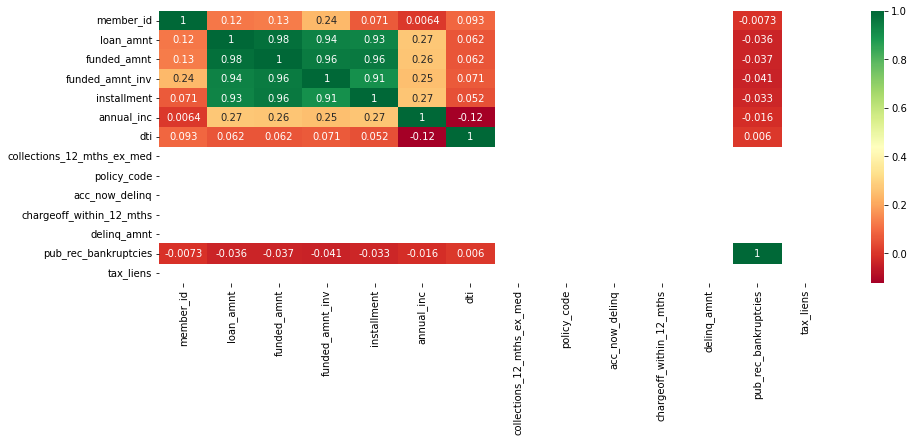

In [69]:
# generating a heat map for the correlations.
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df_credit.corr(), annot=True, cmap="RdYlGn")
plt.show()

## **Conclusion**

### List of variables shortlisted after assessment:
* **Numerical Variables:**
  * Loan amount: Loan amount seems to be one of the important factors as it is highly correlated with 'funded_amnt', 'funded_amnt_inv' and 'installment' which implies that it explains the impact of all these variables.
  * Annual income: This variable does not correlate with any other factor considering a threshold of 30% and can impact the default risks. 
  * DTI: It is not correlated to any other factors and it provides the financial risk appetite of the customer for loan repayment. 
* **Categorical variables:**
  * Home ownership: Most customers taking the loan are living on rent and have a relatively lower annual income (<100K) which implies risk of loan defaults is high.
  * Purpose: The trend clearly shows the purpose of the loan where people have been 'charged-off' is more than those who repayed.

